In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the grayscale image
image_path = 'image.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

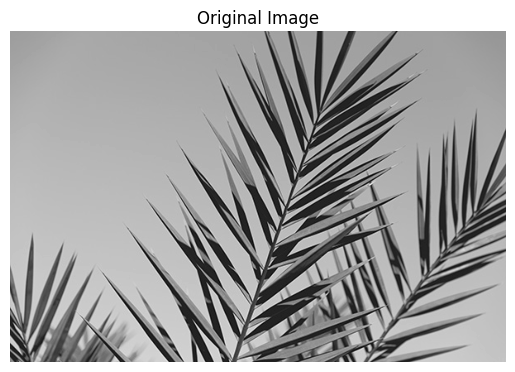

In [3]:
if image is None:
    print("Error: Could not load the image.")
else:
    # Display the original image
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

In [4]:
# Step 2: Define Region Growing Parameters
seed_point = (150, 150)  # Example seed point (x, y)
threshold = 10  # Pixel intensity similarity threshold
segmented_image = np.zeros_like(image)

In [5]:
# Step 3: Region Growing Algorithm
def region_growing(image, seed_point, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    region_intensity = image[seed_point]
    segmented_image[seed_point] = 255  # Start with the seed point
    
    # Create a list of points to check (seed point)
    to_check = [seed_point]
    
    # Directions to check (N, S, E, W)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while to_check:
        current_point = to_check.pop()
        x, y = current_point
        
        # Check the 4 neighbors
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            
            # Make sure the point is within bounds
            if 0 <= nx < rows and 0 <= ny < cols:
                # Check if the intensity difference is within the threshold
                if abs(int(image[nx, ny]) - int(region_intensity)) < threshold:
                    if segmented_image[nx, ny] == 0:  # Not already part of the region
                        segmented_image[nx, ny] = 255  # Add to region
                        to_check.append((nx, ny))  # Add to the points to check
                
    return segmented_image

segmented_image = region_growing(image, seed_point, threshold)

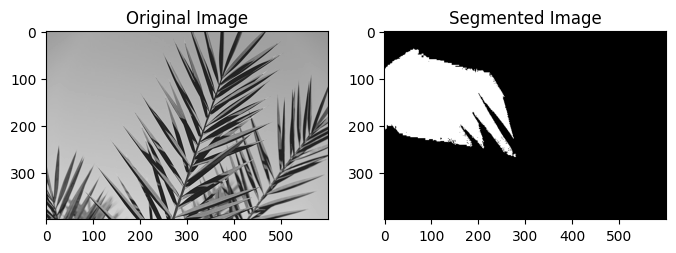

In [6]:
# Step 4: Plot the results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')

plt.show()

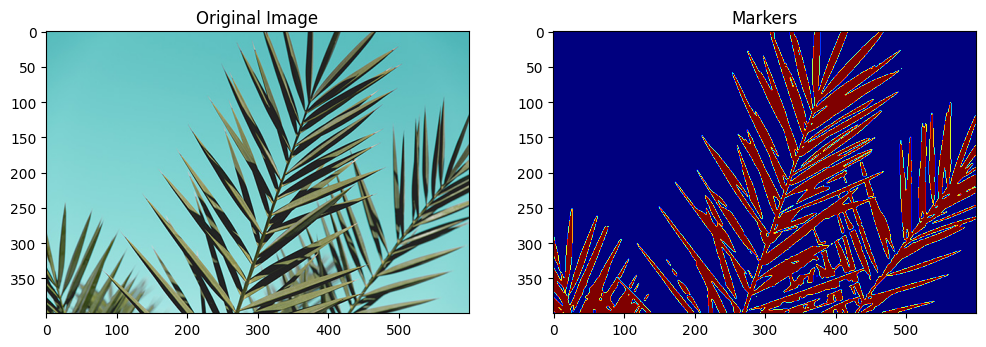

In [14]:
# Step 1: Load the input image
image_path = 'image.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply GaussianBlur to smooth the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Apply thresholding or edge detection (e.g., Canny or simple threshold)
ret, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Step 4: Create markers 
markers = np.zeros_like(gray, dtype=np.int32)  
markers[thresh == 255] = 1  
markers[thresh == 0] = 2  

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Markers')
plt.imshow(markers, cmap='jet')

plt.show()